In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")


In [291]:
data  = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
data  = pd.DataFrame(data)
print("DataFrame shape :",data.shape)

DataFrame shape : (284807, 31)


In [4]:
# missing_values in dataframe
data.isnull().sum()/len(data)*100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Highest Fruad amount was : 2125
Least   Fruad amount was : 0


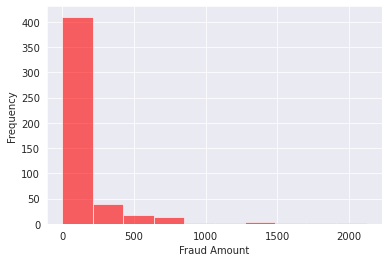

In [6]:
fraud_amount = data[data.Class == 1]["Amount"]
fraud_amount = fraud_amount.astype(int)
fraud_amount.hist(color = "r",alpha = 0.6)
plt.xlabel("Fraud Amount")
plt.ylabel("Frequency")
print("Highest Fruad amount was :",max(fraud_amount))
print("Least   Fruad amount was :",min(fraud_amount))
# i have no idea  how they  , considered amount 0 as fruad transcation .!! Because there is no transcation at all


Text(0, 0.5, 'Frequency')

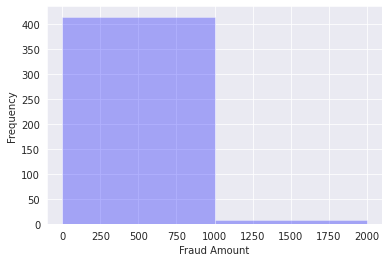

In [7]:
# most of the fraud amount was below 1000
fraud_amount.hist(color = "b",alpha = 0.3,bins = [1,1000,2000])
plt.xlabel("Fraud Amount")
plt.ylabel("Frequency")

0    284315
1       492
Name: Class, dtype: int64
Percentage of class values :
0    99.827251
1     0.172749
Name: Class, dtype: float64


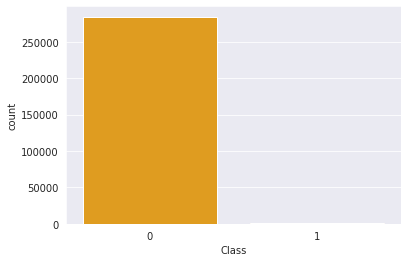

In [8]:
# our Data seems imbalanced 
sns.countplot(data["Class"],color = "orange")
print(data["Class"].value_counts())
print("="*60)
print("Percentage of class values :")
print(data["Class"].value_counts()/len(data)*100)

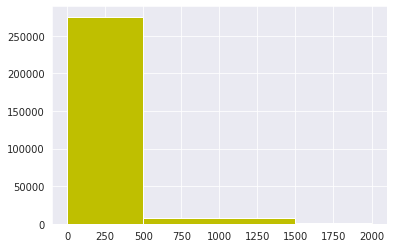

In [9]:
data["Amount"].hist(color = "y",bins = [0,500,1500,2000])

In [292]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data["scaled_amount"] = sc.fit_transform(np.array(data["Amount"]).reshape(-1,1))
data.drop(["Amount","Time"],axis = 1,inplace = True)


In [293]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [294]:
x = data.loc[:,data.columns != "Class"]
y = data.loc[:,"Class"]
print("Features shape :",x.shape)
print("Dependent Variable shape ",y.shape)

Features shape : (284807, 29)
Dependent Variable shape  (284807,)


In [295]:
def train_set(ytrain,train_pred):
    print("confusion matrix for train set : ")
    cm = confusion_matrix(ytrain,train_pred)
    print(cm)
    print("--"*40)
    print("False positive rate :",(cm[1][0]/(cm[1][0]+cm[1][1]))*100)  # FPR = FP/FP +TN
    print("\n")
    print(cm[1][0] ,"out of",(cm[1][0]+cm[1][1]),"fraud transaction instances were classified as not a fraudulent transactions \n")
    print("--"*40)
    print("False Negative rate :",(cm[0][1]/(cm[0][1]+cm[0][0]))*100) # FNR = FN + (FN + TP )
    print("\n")
    print(cm[0][1],"out of ",(cm[0][1]+cm[0][0]),"non fraudulent transaction instances were classified as  a fraudulent transactions")
    print("--"*40)
    print(classification_report(ytrain,train_pred))

In [296]:
def test_set(ytest,test_pred):
    print("confusion matrix for test set : ")
    cm = confusion_matrix(ytest,test_pred)
    print(cm)
    print("--"*40)
    print("False positive rate :",(cm[1][0]/(cm[1][0]+cm[1][1]))*100)  # FPR = FP/FP +TN
    print("\n")
    print(cm[1][0] ,"out of",(cm[1][0]+cm[1][1]),"fraud transaction instances were classified as not a fraudulent transactions \n")
    print("--"*40)
    print("False Negative rate :",(cm[0][1]/(cm[0][1]+cm[0][0]))*100) # FNR = FN + (FN + TP )
    print("\n")
    print(cm[0][1],"out of ",(cm[0][1]+cm[0][0]),"non fraudulent transaction instances were classified as  a fraudulent transactions")
    print("--"*40)
    print(classification_report(ytest,test_pred))

In [297]:
def under_sample(data):
    under_sample_zero = data[data.Class == 0].iloc[:,:]
    under_sample_zero = under_sample_zero.sample(data.Class.value_counts()[1])
    under_sample_one  = data[data.Class == 1].iloc[:,:]
    under_sampled_data = pd.concat([under_sample_zero,under_sample_one],axis = 0)
    x = under_sampled_data.loc[:,under_sampled_data.columns != "Class"]
    y = under_sampled_data.loc[:,"Class"]
    return us_x,us_y



under_sampled_data size      :  (984, 30)
sample size where class is 0 : (492, 30)
sample size where class is 1 : (492, 30)
Features shape : (284807, 29)
Dependent Variable shape  (284807,)


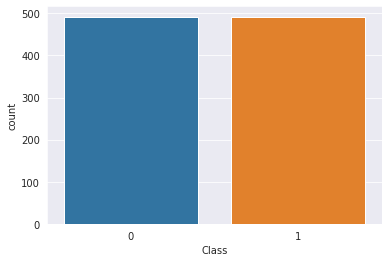

In [298]:
# Now we have equal number of 1's and 0's ,i.e we have balanced data !

print("under_sampled_data size      : ",under_sampled_data.shape)
print("sample size where class is 0 :",under_sample_zero.shape)
print("sample size where class is 1 :",under_sample_one.shape)
print("Features shape :",x.shape)
print("Dependent Variable shape ",y.shape)
sns.countplot(under_sampled_data.Class)
plt.show()

1. #  Let's build our model without treating imbalanced data

# Logistic Regression

In [299]:

lr_model = LogisticRegression()
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.4,random_state = 1)
lr_model.fit(xtrain,ytrain)
#train_set
train_pred = lr_model.predict(xtrain)
#test_set
test_pred  = lr_model.predict(xtest)
print("Accuracy for Training set : ",accuracy_score(ytrain,train_pred))
print("Accuracy for Testing set  : ",accuracy_score(ytest,test_pred))


Accuracy for Training set :  0.9992568057863814
Accuracy for Testing set  :  0.9991573255620024


In [300]:
train_set(ytrain,train_pred)

confusion matrix for train set : 
[[170553     25]
 [   102    204]]
--------------------------------------------------------------------------------
False positive rate : 33.33333333333333


102 out of 306 fraud transaction instances were classified as not a fraudulent transactions 

--------------------------------------------------------------------------------
False Negative rate : 0.014656051776899718


25 out of  170578 non fraudulent transaction instances were classified as  a fraudulent transactions
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170578
           1       0.89      0.67      0.76       306

    accuracy                           1.00    170884
   macro avg       0.95      0.83      0.88    170884
weighted avg       1.00      1.00      1.00    170884



## 33% of  fraud transaction instances were classified as not a fraudulent transactions

In [301]:
test_set(ytest,test_pred)

confusion matrix for test set : 
[[113716     21]
 [    75    111]]
--------------------------------------------------------------------------------
False positive rate : 40.32258064516129


75 out of 186 fraud transaction instances were classified as not a fraudulent transactions 

--------------------------------------------------------------------------------
False Negative rate : 0.01846364859280621


21 out of  113737 non fraudulent transaction instances were classified as  a fraudulent transactions
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113737
           1       0.84      0.60      0.70       186

    accuracy                           1.00    113923
   macro avg       0.92      0.80      0.85    113923
weighted avg       1.00      1.00      1.00    113923



##  40% fraud transaction instances were classified as not a fraudulent transactions ,that's really bad

## *our goal is to reduce false positive rate* ,
Note :  again it's entirely depends on the business requirement 


# Let's use  Under Sampling technique for handling imbalanced data

# Now using Logistic Regression after allowing Under_sampling

In [302]:
lr_model = LogisticRegression()
us_x,us_y = under_sample(data)
xtrain,xtest,ytrain,ytest = train_test_split(us_x,us_y,test_size = 0.4,random_state = 1)
lr_model.fit(xtrain,ytrain)
#train_set
train_pred = lr_model.predict(xtrain)
#test_set
test_pred  = lr_model.predict(xtest)
print("Accuracy for Training set : ",accuracy_score(ytrain,train_pred))
print("Accuracy for Testing set  : ",accuracy_score(ytest,test_pred))
roc_auc_logistic = roc_auc_score(ytest,test_pred)


Accuracy for Training set :  0.9305084745762712
Accuracy for Testing set  :  0.9060913705583756


In [303]:
train_set(ytrain,train_pred)
# on applying undersampling technique we got !
# Decrease in False positive rate ,
# Increase in precision,recall,f1-score 

confusion matrix for train set : 
[[285  11]
 [ 30 264]]
--------------------------------------------------------------------------------
False positive rate : 10.204081632653061


30 out of 294 fraud transaction instances were classified as not a fraudulent transactions 

--------------------------------------------------------------------------------
False Negative rate : 3.7162162162162162


11 out of  296 non fraudulent transaction instances were classified as  a fraudulent transactions
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       296
           1       0.96      0.90      0.93       294

    accuracy                           0.93       590
   macro avg       0.93      0.93      0.93       590
weighted avg       0.93      0.93      0.93       590



In [304]:
test_set(ytest,test_pred)
# on applying undersampling technique we got !
# Decrease in False positive rate ,
# Increase in precision,recall,f1-score 

confusion matrix for test set : 
[[193   3]
 [ 34 164]]
--------------------------------------------------------------------------------
False positive rate : 17.17171717171717


34 out of 198 fraud transaction instances were classified as not a fraudulent transactions 

--------------------------------------------------------------------------------
False Negative rate : 1.530612244897959


3 out of  196 non fraudulent transaction instances were classified as  a fraudulent transactions
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       196
           1       0.98      0.83      0.90       198

    accuracy                           0.91       394
   macro avg       0.92      0.91      0.91       394
weighted avg       0.92      0.91      0.91       394



# Random Forest Classifier 

## let's analyze effect of  random forest without handling imbalanced data.


In [305]:

rf_model = RandomForestClassifier(n_estimators=20,max_depth = 10,min_samples_split = 20)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.4,random_state = 1)
rf_model.fit(xtrain,ytrain)
#train_set
train_pred = rf_model.predict(xtrain)
#test_set
test_pred  = rf_model.predict(xtest)


In [306]:
print("Accuracy for Training set : ",accuracy_score(ytrain,train_pred))
print("Accuracy for Testing set  : ",accuracy_score(ytest,test_pred)) 

Accuracy for Training set :  0.9996079211628941
Accuracy for Testing set  :  0.999438217041335


In [307]:
train_set(ytrain,train_pred)
# 57 out of 306 fraud transaction instances were classified as non a fraudulent transactions 

confusion matrix for train set : 
[[170569      9]
 [    58    248]]
--------------------------------------------------------------------------------
False positive rate : 18.954248366013072


58 out of 306 fraud transaction instances were classified as not a fraudulent transactions 

--------------------------------------------------------------------------------
False Negative rate : 0.005276178639683898


9 out of  170578 non fraudulent transaction instances were classified as  a fraudulent transactions
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170578
           1       0.96      0.81      0.88       306

    accuracy                           1.00    170884
   macro avg       0.98      0.91      0.94    170884
weighted avg       1.00      1.00      1.00    170884



In [245]:
test_set(ytest,test_pred)
# 51 out of 186 fraud transaction instances were classified as not a fraudulent transactions
# 25% of fradulent transaction were classified as non fraudulent transactions

confusion matrix for test set : 
[[113718     19]
 [    50    136]]
--------------------------------------------------------------------------------
False positive rate : 26.881720430107524


50 out of 186 fraud transaction instances were classified as not a fraudulent transactions 

--------------------------------------------------------------------------------
False Negative rate : 0.01670520586968181


19 out of  113737 non fraudulent transaction instances were classified as  a fraudulent transactions
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113737
           1       0.88      0.73      0.80       186

    accuracy                           1.00    113923
   macro avg       0.94      0.87      0.90    113923
weighted avg       1.00      1.00      1.00    113923



# let's use UnderSampling technique for Random Forest

In [308]:
us_x,us_y = under_sample(data)
rf_model = RandomForestClassifier(n_estimators=20,max_depth = 10,min_samples_split = 20)
xtrain,xtest,ytrain,ytest = train_test_split(us_x,us_y,test_size = 0.4,random_state = 1)
rf_model.fit(xtrain,ytrain)
#train_set
train_pred = rf_model.predict(xtrain)
#test_set
test_pred  = rf_model.predict(xtest)
roc_auc_random = roc_auc_score(ytest,test_pred)

In [309]:
train_set(ytrain,train_pred)
# on applying undersampling technique we got !
# Decrease in False positive rate ,
# Increase in precision,recall,f1-score 

confusion matrix for train set : 
[[291   5]
 [ 17 277]]
--------------------------------------------------------------------------------
False positive rate : 5.782312925170068


17 out of 294 fraud transaction instances were classified as not a fraudulent transactions 

--------------------------------------------------------------------------------
False Negative rate : 1.6891891891891893


5 out of  296 non fraudulent transaction instances were classified as  a fraudulent transactions
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       296
           1       0.98      0.94      0.96       294

    accuracy                           0.96       590
   macro avg       0.96      0.96      0.96       590
weighted avg       0.96      0.96      0.96       590



In [310]:
test_set(ytest,test_pred)
# on applying undersampling technique we got !
# Decrease in False positive rate ,
# Increase in precision,recall,f1-score 

confusion matrix for test set : 
[[187   9]
 [ 28 170]]
--------------------------------------------------------------------------------
False positive rate : 14.14141414141414


28 out of 198 fraud transaction instances were classified as not a fraudulent transactions 

--------------------------------------------------------------------------------
False Negative rate : 4.591836734693878


9 out of  196 non fraudulent transaction instances were classified as  a fraudulent transactions
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       196
           1       0.95      0.86      0.90       198

    accuracy                           0.91       394
   macro avg       0.91      0.91      0.91       394
weighted avg       0.91      0.91      0.91       394



# Let's Calculate roc_auc_score in order to find out which algorithm out of (Logistic Reg v/s Random Forest) performed well on applying Undersampling Technique . 

In [311]:
# for test_set's only (validation set)
print("ROC_AUC_SCORE FOR LOGISTIC REG IS  : ",roc_auc_logistic)
print("ROC_AUC_SCORE FOR Random Forest IS : ",roc_auc_random)
# both algo's are working equally ,

ROC_AUC_SCORE FOR LOGISTIC REG IS  :  0.9064883529169243
ROC_AUC_SCORE FOR Random Forest IS :  0.9063337456194599


# Let's See Handling Imbalanced Data with Oversampling Technique (SMOTE).
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html

Feature size   after oversampling : (568630, 29)
Dependent size after oversampling : (568630,)


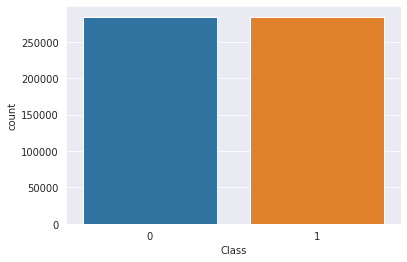

In [282]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 1)
over_sam_x,over_sam_y = sm.fit_sample(x,y)
print("Feature size   after oversampling :",over_sam_x.shape)
print("Dependent size after oversampling :",over_sam_y.shape)
sns.countplot(y)

# over sampling technique using Logistic Regression 

In [286]:

xtrain,xtest,ytrain,ytest = train_test_split(over_sam_x,over_sam_y,test_size = 0.4,random_state = 1)
lr_model.fit(xtrain,ytrain)
#train_set
train_pred = lr_model.predict(xtrain)
#test_set
test_pred  = lr_model.predict(xtest)
print("Accuracy for Training set : ",accuracy_score(ytrain,train_pred))
print("Accuracy for Testing set  : ",accuracy_score(ytest,test_pred))
over_sam_roc_auc_logistic = roc_auc_score(ytest,test_pred)

Accuracy for Training set :  0.9466524805233631
Accuracy for Testing set  :  0.9463403267502594


In [284]:
train_set(ytrain,train_pred)
# on applying undersampling technique we got !
# Decrease in False positive rate ,
# Increase in precision,recall,f1-score 

confusion matrix for train set : 
[[166298   4225]
 [ 13976 156679]]
--------------------------------------------------------------------------------
False positive rate : 8.189622337464474


13976 out of 170655 fraud transaction instances were classified as not a fraudulent transactions 

--------------------------------------------------------------------------------
False Negative rate : 2.477671633738557


4225 out of  170523 non fraudulent transaction instances were classified as  a fraudulent transactions
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    170523
           1       0.97      0.92      0.95    170655

    accuracy                           0.95    341178
   macro avg       0.95      0.95      0.95    341178
weighted avg       0.95      0.95      0.95    341178



In [285]:
test_set(ytest,test_pred)
# on applying undersampling technique we got !
# Decrease in False positive rate ,
# Increase in precision,recall,f1-score

confusion matrix for test set : 
[[110826   2966]
 [  9239 104421]]
--------------------------------------------------------------------------------
False positive rate : 8.128629245117015


9239 out of 113660 fraud transaction instances were classified as not a fraudulent transactions 

--------------------------------------------------------------------------------
False Negative rate : 2.606510123734533


2966 out of  113792 non fraudulent transaction instances were classified as  a fraudulent transactions
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.97      0.95    113792
           1       0.97      0.92      0.94    113660

    accuracy                           0.95    227452
   macro avg       0.95      0.95      0.95    227452
weighted avg       0.95      0.95      0.95    227452



# over sampling technique Random Forest Algorithm

In [287]:
rf_model = RandomForestClassifier(n_estimators=20,max_depth = 10,min_samples_split = 20)
xtrain,xtest,ytrain,ytest = train_test_split(over_sam_x,over_sam_y,test_size = 0.4,random_state = 1)
rf_model.fit(xtrain,ytrain)
#train_set
train_pred = rf_model.predict(xtrain)
#test_set
test_pred  = rf_model.predict(xtest)
print("Accuracy for Training set : ",accuracy_score(ytrain,train_pred))
print("Accuracy for Testing set  : ",accuracy_score(ytest,test_pred))
over_sam_roc_auc_random_forest = roc_auc_score(ytest,test_pred)

Accuracy for Training set :  0.988589533908986
Accuracy for Testing set  :  0.9878172097849216


In [288]:
train_set(ytrain,train_pred)
# on applying undersampling technique we got !
# Decrease in False positive rate ,
# Increase in precision,recall,f1-score 

confusion matrix for train set : 
[[170238    285]
 [  3608 167047]]
--------------------------------------------------------------------------------
False positive rate : 2.114207025870909


3608 out of 170655 fraud transaction instances were classified as not a fraudulent transactions 

--------------------------------------------------------------------------------
False Negative rate : 0.16713287943561866


285 out of  170523 non fraudulent transaction instances were classified as  a fraudulent transactions
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    170523
           1       1.00      0.98      0.99    170655

    accuracy                           0.99    341178
   macro avg       0.99      0.99      0.99    341178
weighted avg       0.99      0.99      0.99    341178



In [289]:
test_set(ytest,test_pred)
# on applying undersampling technique we got !
# Decrease in False positive rate ,
# Increase in precision,recall,f1-score

confusion matrix for test set : 
[[113561    231]
 [  2540 111120]]
--------------------------------------------------------------------------------
False positive rate : 2.2347351750835824


2540 out of 113660 fraud transaction instances were classified as not a fraudulent transactions 

--------------------------------------------------------------------------------
False Negative rate : 0.20300196850393698


231 out of  113792 non fraudulent transaction instances were classified as  a fraudulent transactions
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    113792
           1       1.00      0.98      0.99    113660

    accuracy                           0.99    227452
   macro avg       0.99      0.99      0.99    227452
weighted avg       0.99      0.99      0.99    227452



# Let's Calculate roc_auc_score in order to find out which algorithm out of (Logistic Reg v/s Random Forest) performed well on applying OverSampling Technique . 

In [290]:
# for test_set's only 
print("ROC_AUC_SCORE FOR LOGISTIC REG IS  : ",over_sam_roc_auc_logistic)
print("ROC_AUC_SCORE FOR Random Forest IS : ",over_sam_roc_auc_random_forest)
#  Random Forest performs well compared to Logistic Regression.

ROC_AUC_SCORE FOR LOGISTIC REG IS  :  0.9463243031557423
ROC_AUC_SCORE FOR Random Forest IS :  0.9878113142820624


Note (in this use case) : On applying Over Sampling technique in order to deal with Imbalanced Dataset provides better result compared to Under Sampling technique ( observe  Confusion Matrix of under v/s over techniques in order to understand )

Thank you :)